In [1]:
import numpy as np
import os
import numpy as np
import csv
from PIL import Image
from tqdm import tqdm
from os.path import join as pathj
import glob
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from statistics import median

In [ ]:
# 查询当前系统所有字体
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

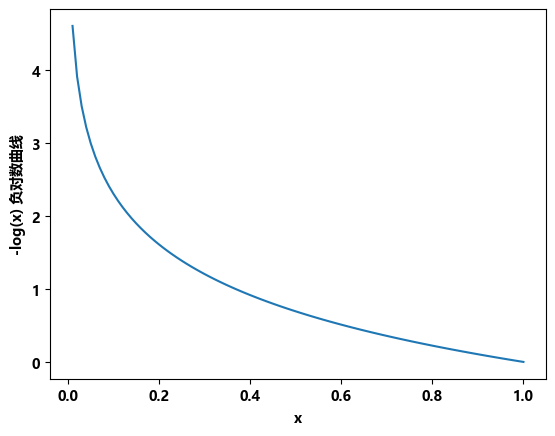

In [11]:
import torch
import matplotlib.pyplot as plt
import matplotlib
plt.rc("font",family='MicroSoft YaHei') # 字体设置
EPS = 1e-6
x = torch.linspace(0.01, 1, 100)
y = -torch.log(x + EPS)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('-log(x) 负对数曲线')
plt.show()


tensor(0)


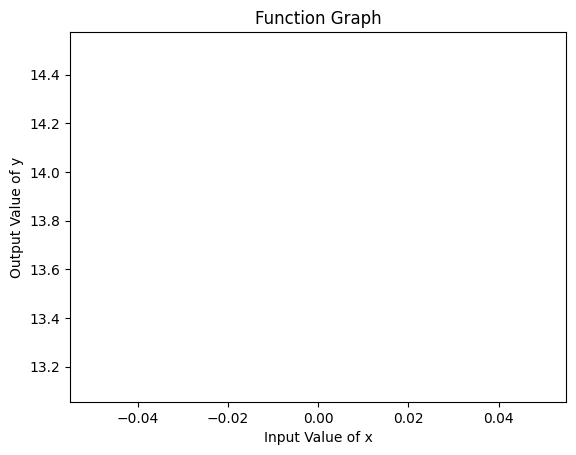

In [4]:
import matplotlib.pyplot as plt  #导入绘图库
import torch 
#定义待绘图的函数

def my_function(x):
    x=torch.tensor(x)
    print(x)
    return -torch.log(x + EPS) #此处为示例函数，可以根据自己的需求改变

#定义绘图范围
x_values = range(0,1,100)  #上下限分别为-10到+10，共21个数据点
y_values = [my_function(x) for x in x_values]

#绘制曲线图
plt.plot(x_values, y_values)
plt.title('Function Graph')   #设置标题为'Function Graph'
plt.xlabel('Input Value of x')   #设置横轴标签
plt.ylabel('Output Value of y')  #设置纵轴标签
plt.show()  #展示绘图结果


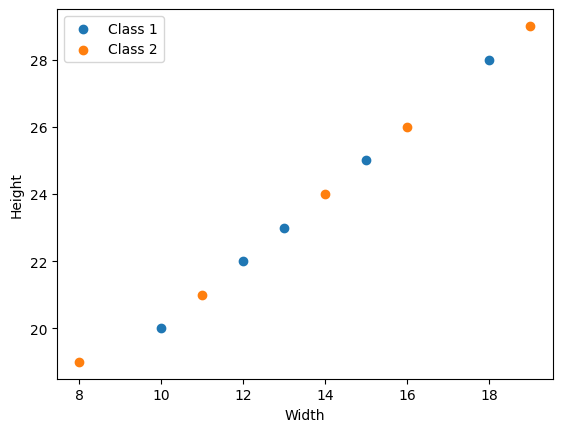

In [2]:
import matplotlib.pyplot as plt

# 定义不同类别的真实宽高数据
class1_widths = [10, 12, 13, 15, 18]
class1_heights = [20, 22, 23, 25, 28]

class2_widths = [8, 11, 14, 16, 19]
class2_heights = [19, 21, 24, 26, 29]

# 绘制散点图
plt.scatter(class1_widths, class1_heights, label='Class 1')
plt.scatter(class2_widths, class2_heights, label='Class 2')

# 设置坐标轴标签和图例
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()

# 展示图像
plt.show()


## 1 训练数据集

In [5]:

imgr_dir = r'E:\visDrone2019\VisDrone2019-DET-train' 
imgs_dir = pathj(imgr_dir, 'images')
IMAGE_FORMAT = ['png','jpg']
img_name_l = [x for x in os.listdir(imgs_dir) if x.split('.')[-1] in IMAGE_FORMAT]
list_l = []
per_x =[]
per_y =[]
for img_name in tqdm(img_name_l):
    img = Image.open(pathj(imgs_dir, img_name))
    w = img.width       #图片的宽
    h = img.height
    key = str(w)+'@'+ str(h)
    list_l.append(key)
    per_x.append(w)
    per_y.append(h)
unique_classes, nt = np.unique(list_l, return_counts=True)

100%|██████████| 6471/6471 [00:05<00:00, 1155.45it/s]


## 2 SA_36应用数据集

In [3]:

root_dir = r'D:\sa_data\0005_sa_v1.5_noclean'
test_folder_list = os.listdir(root_dir)
img_name_l =[]
# glob库获取全部图片
for test_folder in test_folder_list:
    from01 = glob.glob(f'{root_dir}/{test_folder}/imgs/*')
    img_name_l.extend(from01)
list_l = []
per_x =[]
per_y =[]
for img_name in tqdm(img_name_l):
    img = Image.open(img_name)
    w = img.width       #图片的宽
    h = img.height
    key = str(w)+'@'+ str(h)
    if key in ['2560@1440', '2560@1377', '1920@1048', '1920@937']:
        continue
    list_l.append(key)
    per_x.append(w)
    per_y.append(h)
# unique_classes, nt = np.unique(list_l, return_counts=True)

100%|██████████| 5644/5644 [00:28<00:00, 199.64it/s] 


In [6]:
i = nt.argsort()[::-1]
domain_key = unique_classes[i]
domain_num = nt[i]
key_num = {domain_key[i]: domain_num[i] for i in range(len(nt))}
domain_key[:4]
# for i in range(20):
#     print(f'{domain_key[i]} : {domain_num[i]}')

array(['1400@1050', '1400@788', '2000@1500', '1360@765'], dtype='<U9')

In [8]:
for i in range(len(domain_key)):
    print(f'{domain_key[i]} : {domain_num[i]}')

1400@1050 : 2498
1400@788 : 1299
2000@1500 : 772
1360@765 : 743
1916@1078 : 537
1920@1080 : 339
960@540 : 250
1398@1048 : 30
480@360 : 1
1389@1042 : 1
1344@756 : 1


In [4]:
fig_set = {
    'figsize': [15, 10],
    'fontsize': 10,
    'xticks_angle': 0,
    'out_name': 'data'
}

In [4]:
class_name =[1]

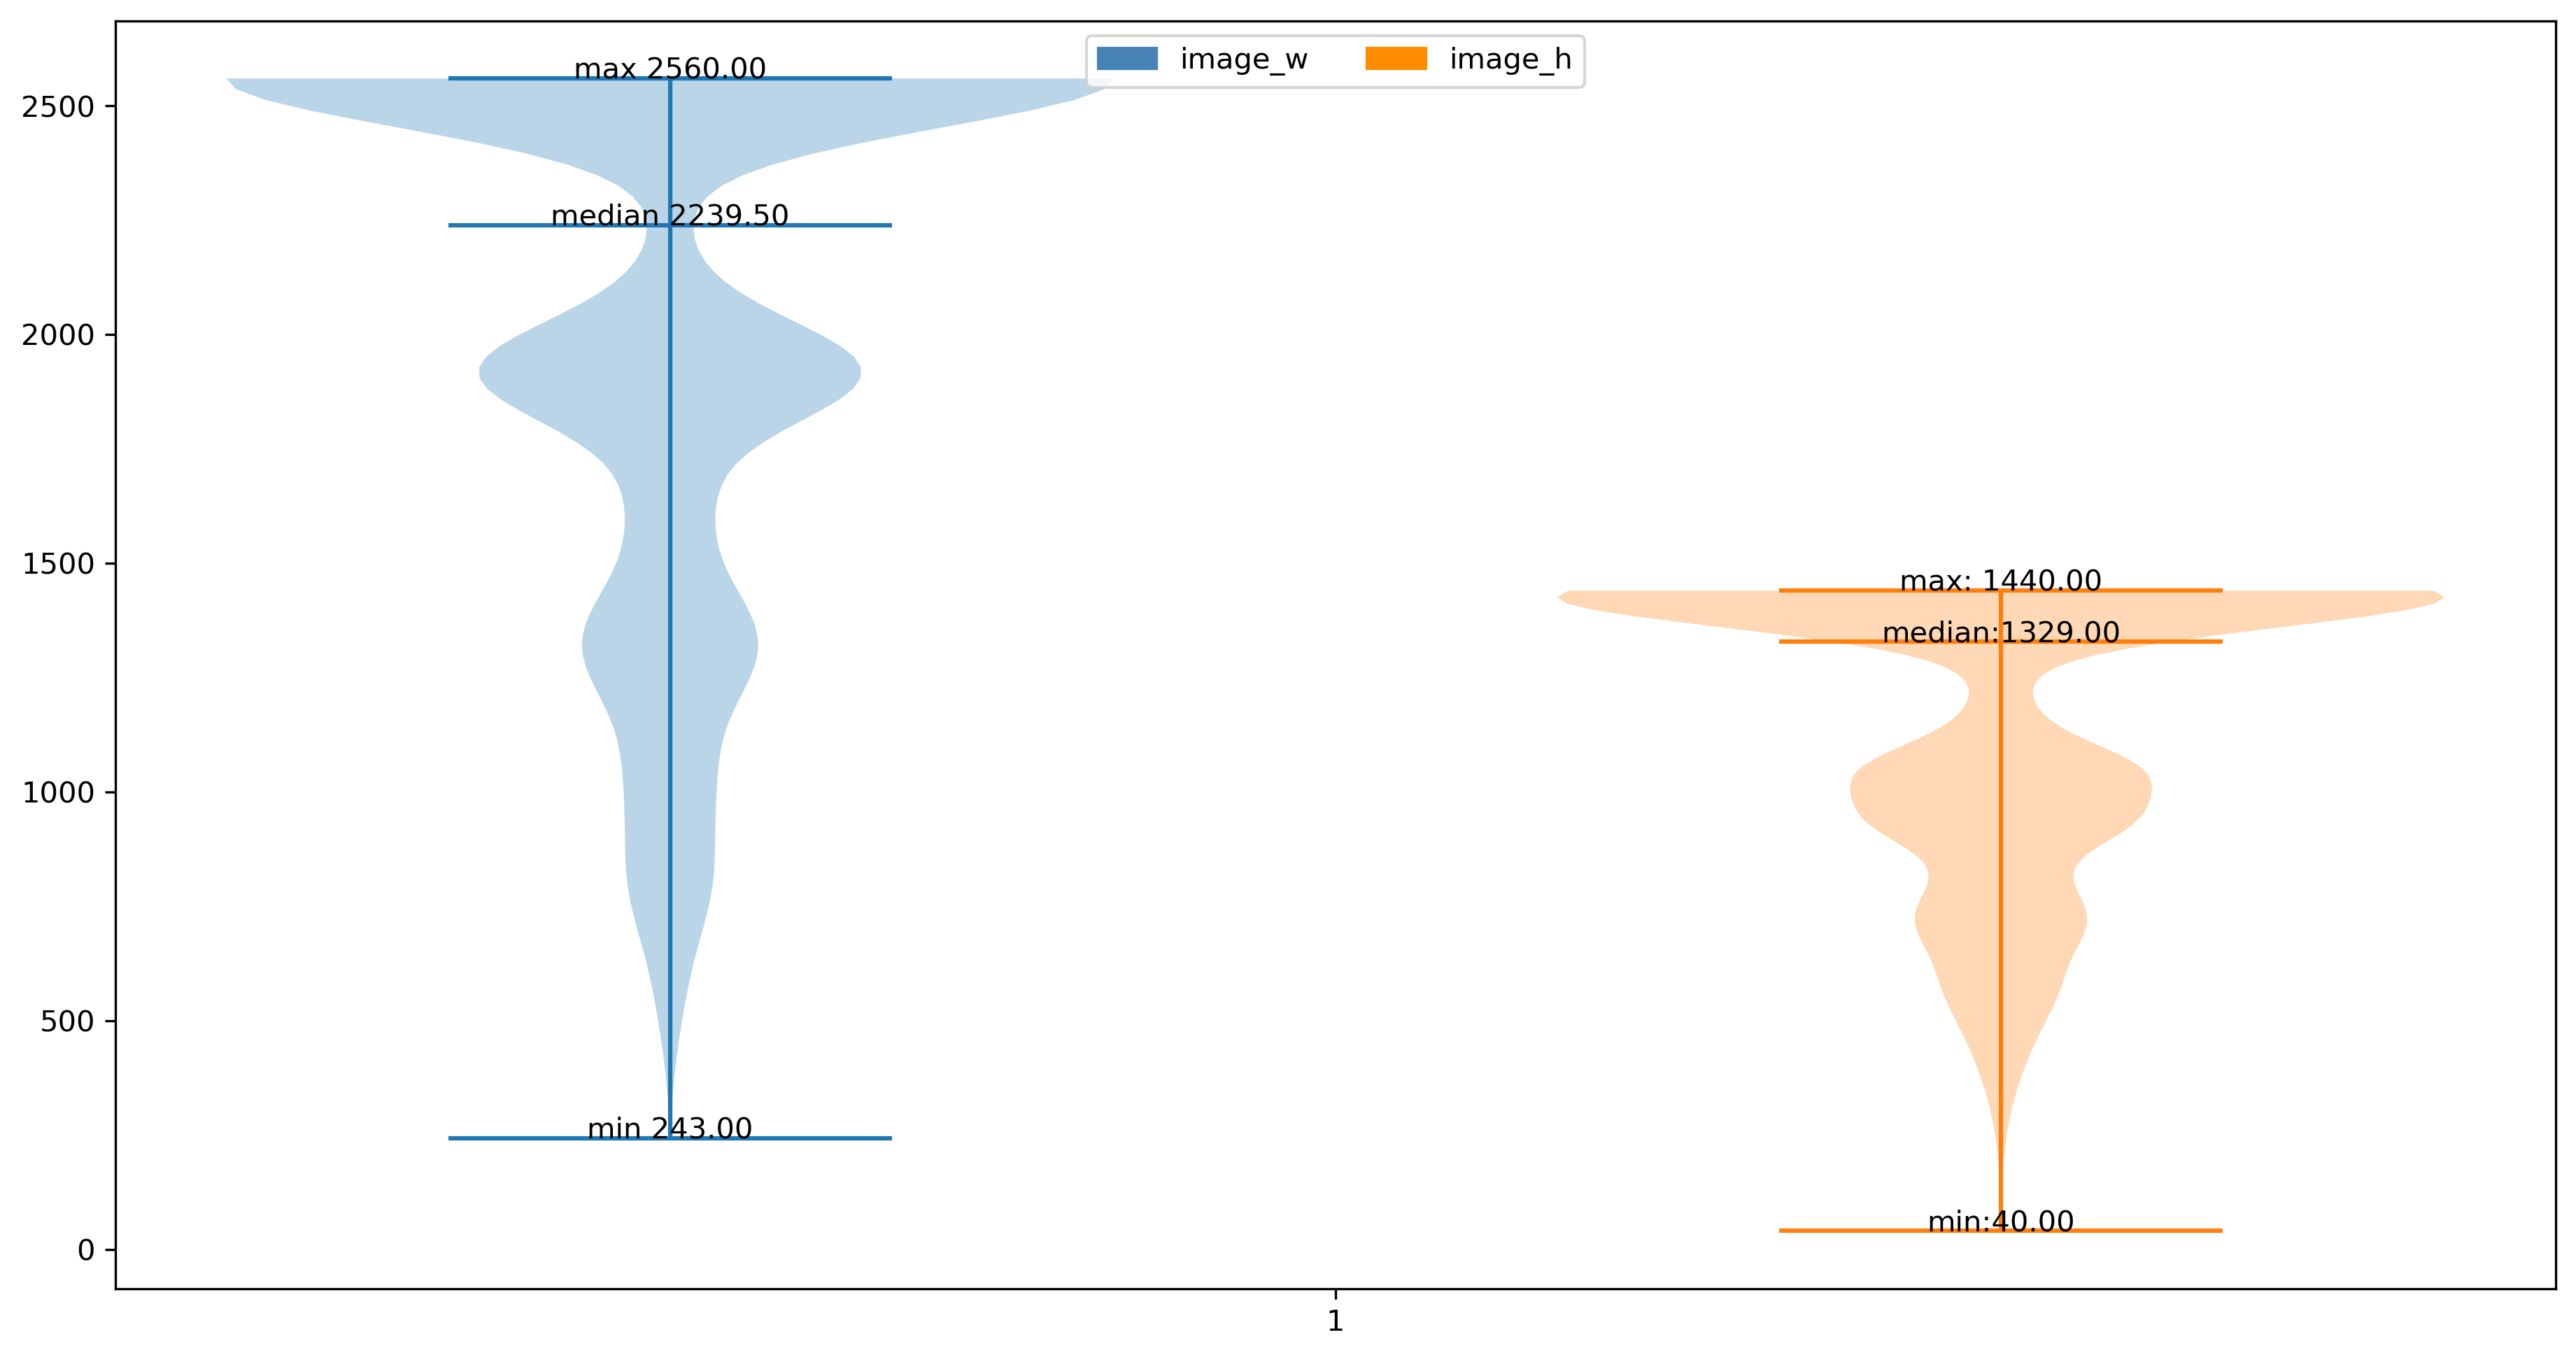

In [6]:
fig, ax = plt.subplots(
    figsize=(fig_set['figsize'][0], fig_set['figsize'][1]), dpi=300)

# Set the position of the map and label on the x-axis
positions_w = list(range(0, 12 * len(class_name), 12))
positions_h = list(range(6, 12 * len(class_name), 12))
positions_x_lable = list(range(3, 12 * len(class_name) + 1, 12))
# image_w = [1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920]
# image_h = [937, 937, 937, 937, 937, 937, 937, 937, 937, 937]
# per_x=[per_x]
# per_y=[per_y]
ax.violinplot(
    per_x, positions_w, showmeans=False, showmedians=True, widths=4)
ax.violinplot(
    per_y, positions_h, showmeans=False, showmedians=True, widths=4)
    # Draw the max, min and median of wide data in violin chart
image_w_max = max(per_x)
image_w_min = min(per_x)

plt.text(
    positions_w[0],
    median(per_x),
    f'{"median %.2f" % median(per_x)}',
    ha='center',
    fontsize=fig_set['fontsize'])
plt.text(
    positions_w[0],
    max(per_x),
    f'{"max %.2f" % max(per_x)}',
    ha='center',
    fontsize=fig_set['fontsize'])
plt.text(
    positions_w[0],
    min(per_x),
    f'{"min %.2f" % min(per_x)}',
    ha='center',
    fontsize=fig_set['fontsize'])

plt.text(
    positions_h[0],
    median(per_y),
    f'{"median:%.2f" % median(per_y)}',
    ha='center',
    fontsize=fig_set['fontsize'])
plt.text(
    positions_h[0],
    max(per_y),
    f'{"max: %.2f" % max(per_y)}',
    ha='center',
    fontsize=fig_set['fontsize'])
plt.text(
    positions_h[0],
    min(per_y),
    f'{"min:%.2f" % min(per_y)}',
    ha='center',
    fontsize=fig_set['fontsize'])
# Draw Legend
plt.setp(ax, xticks=positions_x_lable, xticklabels=class_name)
labels = ['image_w', 'image_h']
colors = ['steelblue', 'darkorange']
patches = [
    mpatches.Patch(color=colors[i], label=f'{labels[i]:s}')
    for i in range(len(colors))
]
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
ax.legend(loc='upper center', handles=patches, ncol=2)

In [7]:
output_dir = 'stat_imgsz'
out_dir = os.path.join(output_dir)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
out_name = fig_set['out_name']
fig.savefig(
    f'{out_dir}/{out_name}_imgsz_wh.jpg',
    bbox_inches='tight',
    pad_inches=0.1)  # Save Image
plt.close()

In [ ]:
from statistics import median
w =[1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920, 1920]
h = [937, 937, 937, 937, 937, 937, 937, 937, 937, 937]

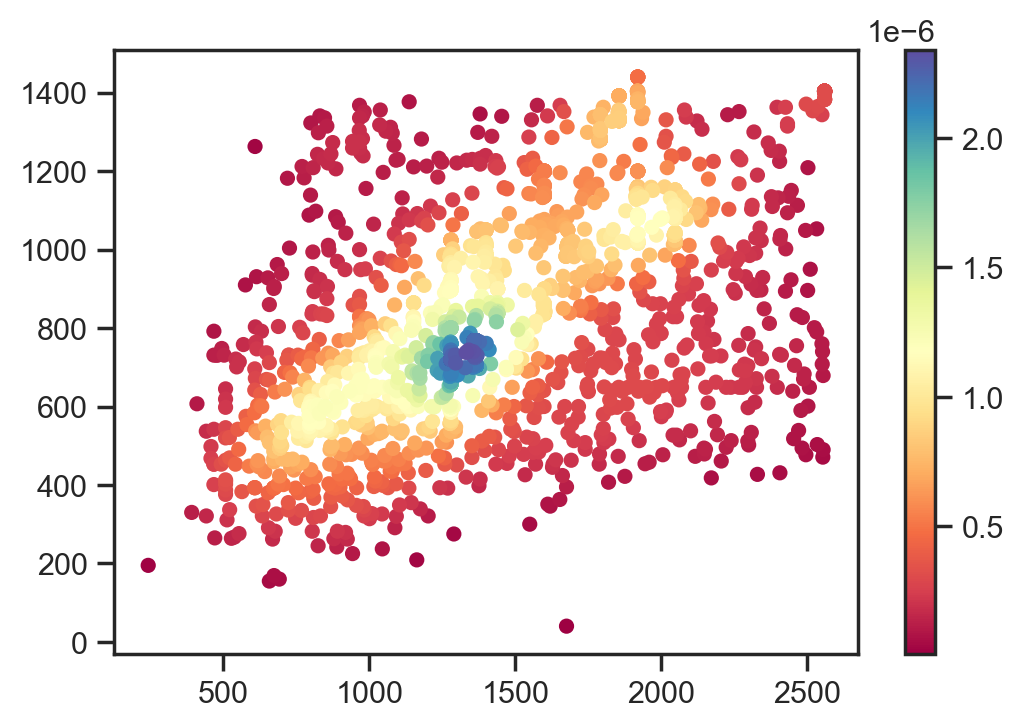

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

# Generate fake data
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)

x = np.array(per_x)
y = np.array(per_y)
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)




# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots( dpi=200)
plt.scatter(x, y, c=z, s=20, cmap='Spectral') # BrBG GnBu Spectral
plt.colorbar()
plt.show()

In [33]:
output_dir = 'stat_imgsz'
out_dir = os.path.join(output_dir)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
out_name = fig_set['out_name']
fig.savefig(
    f'{out_dir}/{out_name}_imgsz_2d_scatter_wh.jpg',
    bbox_inches='tight',
    pad_inches=0.1)  # Save Image
plt.close()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.normal(size=(2, 50))
    sns.kdeplot(
        x=per_x, y=per_y,
        cmap=cmap, fill=True,
        clip=(-5, 5), cut=10,
        thresh=0, levels=15,
        ax=ax,
    )
    ax.set_axis_off()

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)

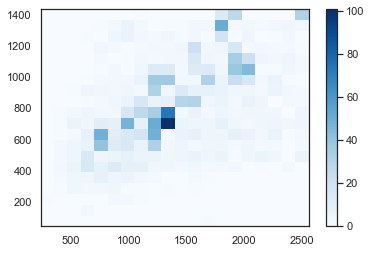

In [10]:
plt.hist2d(per_x, per_y, bins=20, cmap='Blues')
cb = plt.colorbar()
plt.show()

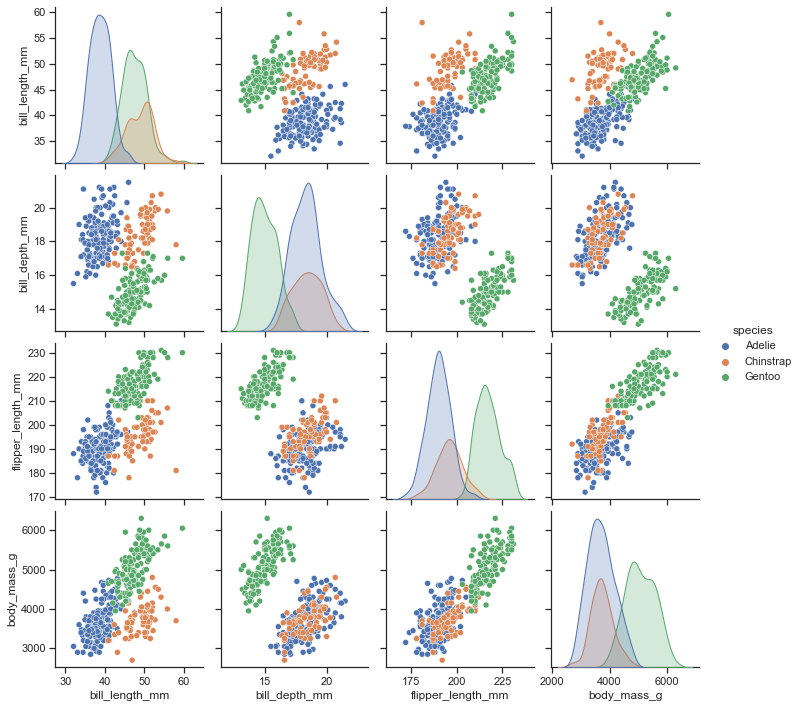

In [39]:
import seaborn as sns
sns.set_theme(style="ticks")

pen = sns.load_dataset("penguins")
sns.pairplot(pen, hue="species")

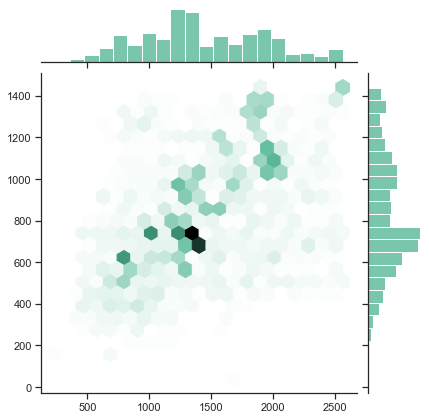

In [34]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=per_x, y=per_y, kind="hex", color="#4CB391")

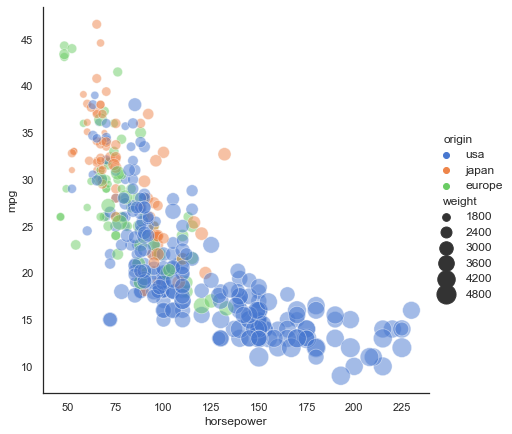

In [37]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)